### PBL-DATA ANALYTICS
#### RAJVEER SINGH
#### Roll No-2100290139011



#### PROJECT - Myntra Fashion Clothing(Fashion Recommendation)


## INTRODUCTION-


#### Myntra is a popular name among fashion enthusiasts, by fashion enthusiasts we mean quite everyone. Everyone wants to make a style statement, and everyone wants to stand out. In this sort of environment, Myntra is a perfect destination for these people. It is a place that caters to a lot of demands in a single and simple setting. A single stop for all things fashion.


## Why I chose Myntra Fashion-

#### In this dataset I analysis the trends of different products according to reviews and ratings according to different categories and brands. I will also remove the different outliers and null values which affect the data.This dataset has   526564 rows and 13columns


### The columns in the dataset are described as follows:
#### 1.	URL of the Product – It has the URL of all product list present in dataset.
#### 2.	Productid – It has the id of all product present in dataset and each value ahs its own unique id so that that no two products have similar id
#### 3.	Brand Name- it contains all top brand names whose products are sell by Myntra online.
#### 4.	Category – It contains all categories of clothes whether its western, Indian and other categories.
#### 5.	Individual category – It contains all individual details like whether its shirt, pants or any other women wear.
#### 6.	Category by gender – It tells whether the products is for women or men.
#### 7.	Description – It tells a detailed description of the product with information about the clothes so that user can think about it before it.
#### 8.	Discount price – It shows the product price after the discount amount is reduced from the main price.
#### 9.	Original price – It shows the original price without reducing the discount price from data.
#### 10.	Discount – The column shows the discount percent of all the products that how much discount is present in data.
#### 11.	Size- It shows how many different sizes of a product is available in store.
#### 12.	Ratings – it shows the ratings of a product given by users to the product.
#### 13.	Reviews - It shows the total reviews shown by different buyers after buying the product from Myntra


#### --------------------------------------------------------------------------------------

### ->FIRST WE IMPORT DIFFERENT PYTHON LIBRARIES WHICH WE WILL USE IN OUR PROJECT

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


warnings.filterwarnings("ignore")

### ->IMPORTING THE EXCEL FILE DATA

In [3]:
data=pd.read_csv("Myntra Fasion Clothing.csv")

In [3]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [8]:
data.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


## ->First we change the column order as we need to check the product_id first then at the end we need to see URL of the product which makes the dataset easy to read


In [9]:
new_order = [1,2,3,4,5,6,7,8,9,10,11,12,0]
data=data[data.columns[new_order]]

# data.head()

### *------------------*---------------------------*

## Getting dimension or shape of dataset ->

In [11]:
data.shape

(526564, 13)

## Using pandas info() to find the non-null values and data types of different columns ->

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Product_id             526564 non-null  int64  
 1   BrandName              526564 non-null  object 
 2   Category               526564 non-null  object 
 3   Individual_category    526564 non-null  object 
 4   category_by_Gender     526564 non-null  object 
 5   Description            526564 non-null  object 
 6   DiscountPrice (in Rs)  333406 non-null  float64
 7   OriginalPrice (in Rs)  526564 non-null  float64
 8   DiscountOffer          452258 non-null  object 
 9   SizeOption             526564 non-null  object 
 10  Ratings                190412 non-null  float64
 11  Reviews                190412 non-null  float64
 12  URL                    526564 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB



### This dataset contains float, int, object values

### ----------------------------------------

## Using pandas .isnull().sum()  to get the count of sum of all null values present ->

In [9]:
data.isnull().sum() 

Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
URL                           0
dtype: int64

### -> There are 4 columns with  null values i.e.
1. DiscountPrice (in Rs)   - 193158
2. DiscountOffer           -  74306
3. Ratings                 - 336152
4. Reviews                 - 336152

# DATA CLEANING

## As we know that the first column with null values is "DiscountPrice (in Rs)" 

### Getting the counts of each value present in the "DiscountPrice (in Rs)" column ->

In [10]:
data["DiscountPrice (in Rs)"].value_counts()

999.0     6341
599.0     5979
899.0     5740
799.0     4293
1199.0    4291
          ... 
1915.0       1
4359.0       1
1962.0       1
2270.0       1
7790.0       1
Name: DiscountPrice (in Rs), Length: 4455, dtype: int64

In [10]:
 ## Getting the statistical values of column 'DiscountPrice (in Rs)' using describe() funtion
data['DiscountPrice (in Rs)'].describe()

count    333406.000000
mean       1237.444401
std        1052.063517
min         127.000000
25%         659.000000
50%         952.000000
75%        1469.000000
max       27996.000000
Name: DiscountPrice (in Rs), dtype: float64

#### As we can see there is lot of variations min max value so we can"t use any statistical value directly related to this columns

# we can use  price values related to different categories ->

In [11]:
data['Category'].value_counts()

Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: Category, dtype: int64

# Using groupby to get the mean of different discount price according to different category ->

In [12]:
data.groupby('Category').mean()['DiscountPrice (in Rs)']

Category
Bottom Wear                 1351.207867
Indian Wear                 1493.337491
Inner Wear &  Sleep Wear     691.839761
Lingerie & Sleep Wear        811.902842
Plus Size                    923.694598
Sports Wear                 1097.378374
Topwear                     1138.634061
Western                     1790.085106
Name: DiscountPrice (in Rs), dtype: float64

# In the following method, we have used groupby() and transform() functions to replace the mean of different  Null values->


In [13]:
data['DiscountPrice (in Rs)'] = data['DiscountPrice (in Rs)'].fillna(data.groupby('Category')['DiscountPrice (in Rs)'].transform('mean'))

In [14]:
data['DiscountPrice (in Rs)'].describe() 


count    526564.000000
mean       1374.993685
std         878.604268
min         127.000000
25%         798.000000
50%        1299.000000
75%        1790.085106
max       27996.000000
Name: DiscountPrice (in Rs), dtype: float64

### Conclusion
#### As we can see there is not that much change in statistical values because we add mean values according to different categories 

In [15]:
data.isnull().sum() # now we succefully remove the null values of this column

Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)         0
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
URL                           0
dtype: int64

### conclusion 
#### the null values of the column 'DiscountPrice (in Rs)' is seccessfully removed


###  --------                     ----------------------                                --------------------

# CLEANING NULL VALUES OF COLUMN 'Ratings'

In [ ]:
data['Ratings'].value_counts()

In [16]:
data['Ratings'].describe() # we can't use mean value in null values here because mean is close to max value which is not a good odea to use in this 

count    190412.000000
mean          4.094892
std           0.494158
min           1.000000
25%           3.900000
50%           4.200000
75%           4.400000
max           5.000000
Name: Ratings, dtype: float64

#### By checking the statistical values we see we can't use mean value in null values here because mean is close to max value which is not a good 

# 

# Plotting boxplot and checking if there is ouliers ->

<AxesSubplot:xlabel='Ratings'>

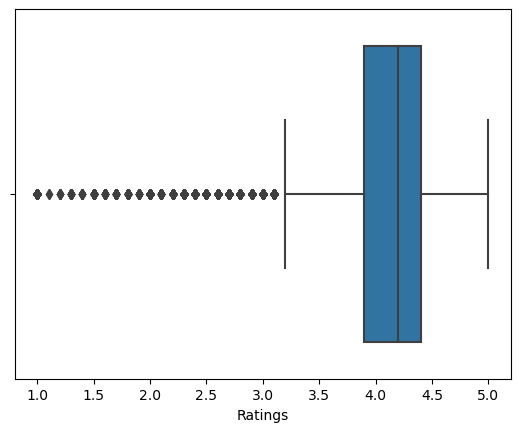

In [17]:

sns.boxplot(data.Ratings)

## Let's see if these are outliers or not

In [20]:
data.Ratings.quantile([0.5,0.7,0.9])

0.5    4.2
0.7    4.3
0.9    4.6
Name: Ratings, dtype: float64

#### No outliers is present 

# 

In [21]:
data.groupby('Category').mean()['Ratings'] 

Category
Bottom Wear                 4.034112
Indian Wear                 4.006331
Inner Wear &  Sleep Wear    4.186591
Lingerie & Sleep Wear       4.131093
Plus Size                   4.127853
Sports Wear                 4.198555
Topwear                     4.130325
Western                     4.099510
Name: Ratings, dtype: float64

####  we can't use mean according to each category so we have to drop this idea too

## Lets find the mean of rating with respect to the 'Individual_category' ->

In [22]:
data.groupby('Individual_category').mean()['Ratings']

Individual_category
baby-dolls    4.004233
bath-robe     4.074129
blazers       3.752813
boots         3.650000
boxers        4.076269
                ...   
trousers      4.033615
trunk         4.195993
tshirts       4.207535
tunics        4.032589
waistcoat     4.154348
Name: Ratings, Length: 92, dtype: float64

### ->Conclusion
#### As we can see the variation of mean using the individual category is a good idea 
#### But there are also some null values whose mean is not shown because of less value counts so we ahve to remove those numbers

In [23]:
data['Individual_category'].value_counts()

tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
jewellery-set         2
hair-accessory        1
lungi                 1
bracelet              1
flip-flops            1
Name: Individual_category, Length: 92, dtype: int64

##  Removing the Individual category data with less value counts

In [24]:
counts = data['Individual_category'].value_counts()

data = data[~data['Individual_category'].isin(counts[counts < 11].index)]

In [25]:
data['Individual_category'].value_counts()

tshirts                 61198
sarees                  57915
tops                    39126
kurtas                  38984
dresses                 35590
                        ...  
patiala-and-dupatta        36
rain-jacket                36
suits                      33
lingerie-accessories       27
slips                      18
Name: Individual_category, Length: 79, dtype: int64

In [26]:
data.groupby('Individual_category').mean()['Ratings'] 

Individual_category
baby-dolls    4.004233
bath-robe     4.074129
blazers       3.752813
boxers        4.076269
bra           4.101788
                ...   
trousers      4.033615
trunk         4.195993
tshirts       4.207535
tunics        4.032589
waistcoat     4.154348
Name: Ratings, Length: 79, dtype: float64

In [27]:
data["Ratings"].describe()

count    190384.000000
mean          4.094888
std           0.494151
min           1.000000
25%           3.900000
50%           4.200000
75%           4.400000
max           5.000000
Name: Ratings, dtype: float64

### -> As we can see the statistical values of the ratings does not changed after removing some data of individual category

## Filling the Average values in null values in 'Ratings' columns with respect to the 'Individual_category' columns

In [28]:
data['Ratings'] = data['Ratings'].fillna(data.groupby('Individual_category')['Ratings'].transform('mean'))

In [29]:
data["Ratings"].describe() 

count    526506.000000
mean          4.078776
std           0.310195
min           1.000000
25%           3.994493
50%           4.066997
75%           4.207535
max           5.000000
Name: Ratings, dtype: float64

## Colnclusion
### So after filling the null values there is not much change in statistcial data

## -------------------------------------------------------------------------

# 

# ->Cleaning null values from the column 'DiscountPrice (in Rs)'

In [30]:
data["DiscountPrice (in Rs)"].isnull().sum()

0

## Statistical values of column->

In [31]:
data["DiscountPrice (in Rs)"].describe()

count    526506.000000
mean       1375.066806
std         878.619381
min         127.000000
25%         798.000000
50%        1299.000000
75%        1790.085106
max       27996.000000
Name: DiscountPrice (in Rs), dtype: float64

# Checking Outliers using boxplot ->

<AxesSubplot:xlabel='DiscountPrice (in Rs)'>

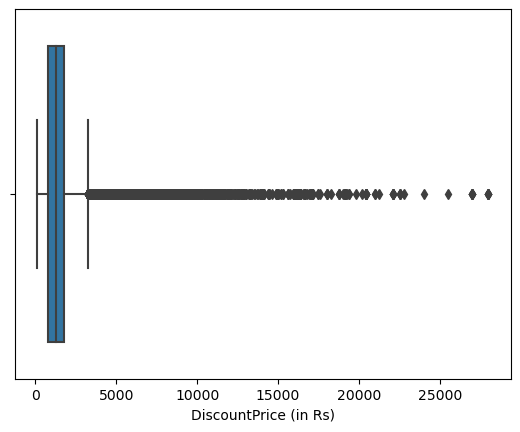

In [32]:
sns.boxplot(data["DiscountPrice (in Rs)"])


#### As we can see here is continuous increase upto 20000 but after that some outliers can be found

# 

In [38]:
data["DiscountPrice (in Rs)"].quantile([0.5,0.7,0.9,0.95,0.99,1])

0.50     1299.000000
0.70     1790.085106
0.90     1849.000000
0.95     2432.000000
0.99     4453.900000
1.00    27996.000000
Name: DiscountPrice (in Rs), dtype: float64

In [39]:
## As we can see after 99% there is outliers  but they are not affecting the data so we can ignore them

# 

## Filling the Average values in null values in 'DiscountPrice (in Rs)' columns with respect to the 'Individual_category' columns  ->

In [40]:
data['DiscountPrice (in Rs)'].value_counts().isnull()

1790.085106     False
1138.634061     False
1351.207867     False
811.902842      False
1493.337491     False
                ...  
1968.000000     False
2611.000000     False
12425.000000    False
2133.000000     False
4240.000000     False
Name: DiscountPrice (in Rs), Length: 4462, dtype: bool

In [41]:
data['DiscountPrice (in Rs)'] = data['DiscountPrice (in Rs)'].fillna(data.groupby('Individual_category')['DiscountPrice (in Rs)'].transform('mean'))

In [42]:
data['DiscountPrice (in Rs)'].isnull().sum()

0

## Removing the remaining null values  ->

In [43]:
data.dropna(subset=['DiscountPrice (in Rs)'], inplace=True)

In [44]:
data['DiscountPrice (in Rs)'].isnull().sum()

0

<AxesSubplot:xlabel='DiscountPrice (in Rs)'>

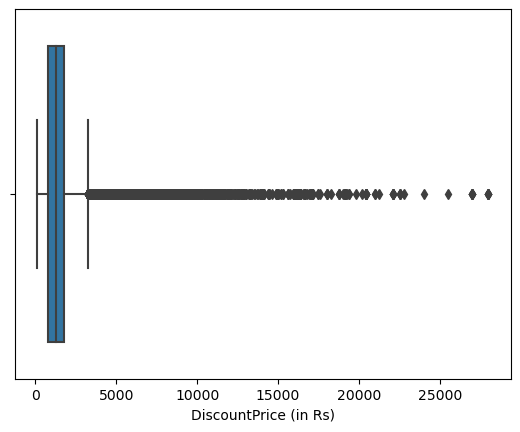

In [45]:
sns.boxplot(data["DiscountPrice (in Rs)"])

### ---------------------------------------------------

## ->Cleaning null values from the column 'DiscountOffer'

In [46]:
data.isnull().sum() 

Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)         0
OriginalPrice (in Rs)         0
DiscountOffer             74297
SizeOption                    0
Ratings                       0
Reviews                  336122
URL                           0
dtype: int64

### First we have to convert column datatype into Integer
### we have to change the discount price missing values according to discount offer 

In [47]:
#data["DiscountOffer)"]=data["DiscountOffer"].str.replace(" OFF","% OFF")
data["DiscountOffer"]=data["DiscountOffer"].str.replace('[OFF,"OFF",Hurry*,' ',"%","Rs. "]', '')

In [48]:
data["DiscountOffer"].value_counts()

50      53208
60      40518
40      27902
20      25595
55      25176
        ...  
1126        1
1153        1
1103        1
1114        1
283         1
Name: DiscountOffer, Length: 1347, dtype: int64

In [49]:
data['DiscountOffer'] = data['DiscountOffer'].fillna(0)

### Conclusion
#### We fill the null values as 0 because there is no discount on those products

In [50]:
data["DiscountOffer"].isnull().sum()

0

### ------------------------------------------------------------

## Cleaning null values from the column "Reviews" ->

In [51]:
data["Reviews"].value_counts().head()

5.0    12168
6.0     9876
7.0     8326
8.0     7345
9.0     6372
Name: Reviews, dtype: int64

## Checking outliers using boxplot ->

<AxesSubplot:xlabel='Reviews'>

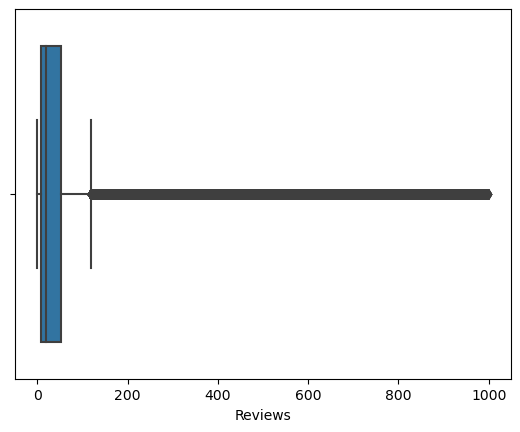

In [52]:
sns.boxplot(data.Reviews)

#### we cannot treat them as outliers as there are feww highers values as continuous

# 

In [53]:
data.groupby('Individual_category').mean()['Reviews'] 

Individual_category
baby-dolls    30.751323
bath-robe     72.995025
blazers       29.610937
boxers        58.688860
bra           63.228319
                ...    
trousers      57.977183
trunk         75.455510
tshirts       73.303920
tunics        76.477679
waistcoat      9.847826
Name: Reviews, Length: 79, dtype: float64

In [54]:
data['Reviews'].describe()

count    190384.000000
mean         61.991402
std         125.719642
min           0.000000
25%           8.000000
50%          18.000000
75%          52.000000
max         999.000000
Name: Reviews, dtype: float64

## We can use forward and backword fill in reviews as in many cases the forwrd and backword values are same ->

In [55]:
data['Reviews'] = data['Reviews'].fillna(method="ffill")
#data['Reviews'] = data['Reviews'].interpolate()


##### we are getting the same result as using the .interpolate() method which is use to guess the missing values in data


In [56]:
data['Reviews'].describe()

count    526506.000000
mean         22.416024
std          81.254729
min           0.000000
25%           0.000000
50%           0.000000
75%           9.000000
max         999.000000
Name: Reviews, dtype: float64

In [57]:
data.isnull().sum()

Product_id               0
BrandName                0
Category                 0
Individual_category      0
category_by_Gender       0
Description              0
DiscountPrice (in Rs)    0
OriginalPrice (in Rs)    0
DiscountOffer            0
SizeOption               0
Ratings                  0
Reviews                  0
URL                      0
dtype: int64

### ----------------------------------------------------------

# REMOVING outliers from column "Orignal price"

In [58]:
data["OriginalPrice (in Rs)"].describe()

count    526506.000000
mean       2414.184590
std        1917.026317
min          99.000000
25%        1299.000000
50%        1999.000000
75%        2899.000000
max       90000.000000
Name: OriginalPrice (in Rs), dtype: float64

<AxesSubplot:xlabel='OriginalPrice (in Rs)'>

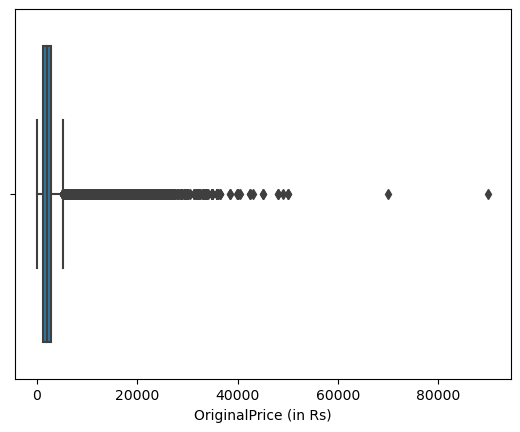

In [59]:
sns.boxplot(data["OriginalPrice (in Rs)"])

In [60]:
data["OriginalPrice (in Rs)"].quantile([0.5,0.7,0.9,0.95,0.96,0.97,0.99])

0.50    1999.0
0.70    2599.0
0.90    4399.0
0.95    5799.0
0.96    6000.0
0.97    6799.0
0.99    9299.0
Name: OriginalPrice (in Rs), dtype: float64

#### As we can see there is outliers after 97% so we have to remove them

In [62]:
min_thresold=data["OriginalPrice (in Rs)"].quantile(0.97)

In [63]:
data.shape

(526506, 13)

## Removing the ouliers which is higher then 0.97 ->

In [64]:
data=data[data["OriginalPrice (in Rs)"]<min_thresold]

In [65]:
data.shape

(510638, 13)

<AxesSubplot:xlabel='OriginalPrice (in Rs)'>

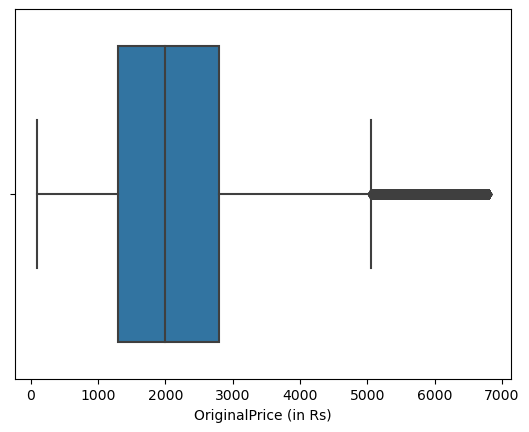

In [66]:
sns.boxplot(data["OriginalPrice (in Rs)"])

# --------------------------------------------------------------------

## UNIVARIATE ANALYSIS

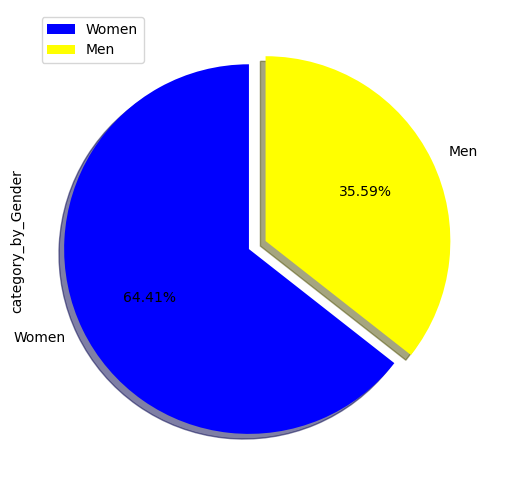

In [5]:
ax=plt.figure(figsize=[8,6])
explode = (0.1, 0)
data["category_by_Gender"].value_counts().plot.pie(explode=explode,autopct = "%.2f%%", shadow=True,colors = ['blue', 'yellow'],startangle=90)
plt.legend()

## Conclusion
### This graph shows the difference in male and female products using bar graph

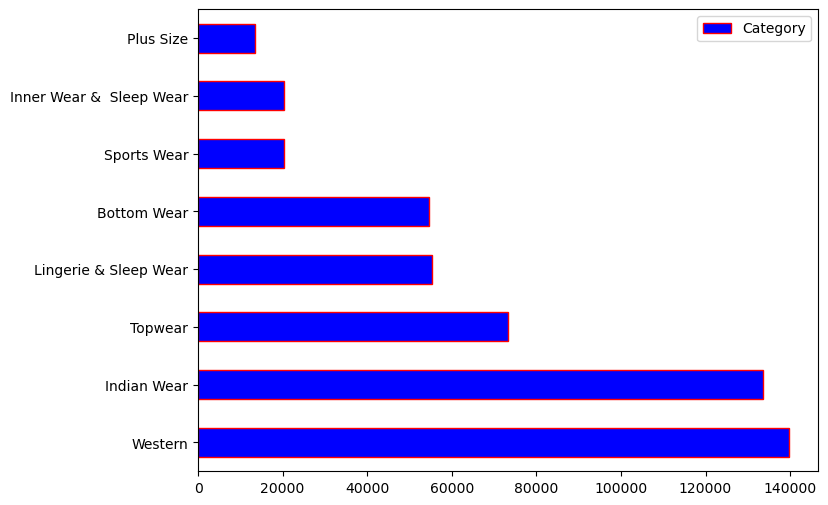

In [68]:
ax=plt.figure(figsize=[8,6])
data["Category"].value_counts().plot.barh(color='blue',edgecolor='red')
plt.legend()

## Conclusion
### This graph shows the difference in Category of different products using bar graph

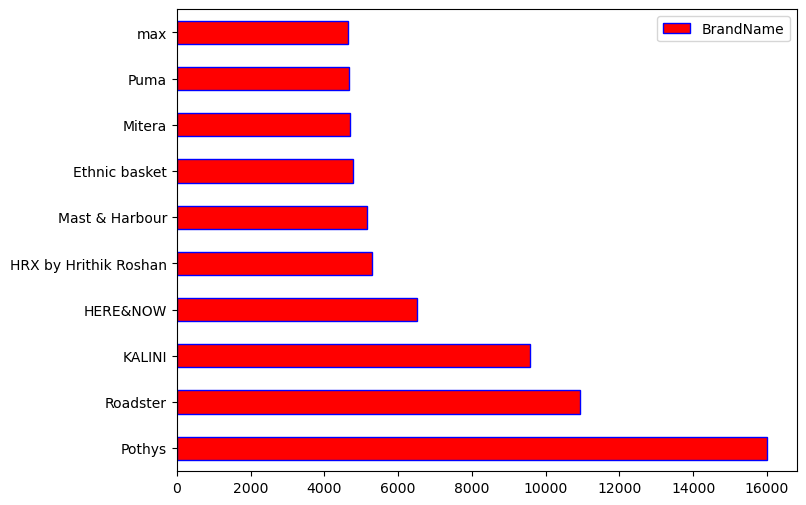

In [6]:
ax=plt.figure(figsize=[8,6])
data["BrandName"].value_counts().head(10).plot.barh(50,200,color='red',edgecolor='blue')
plt.legend()


## Conclusion
### This graph shows the TOP -10 product brand using bar graph


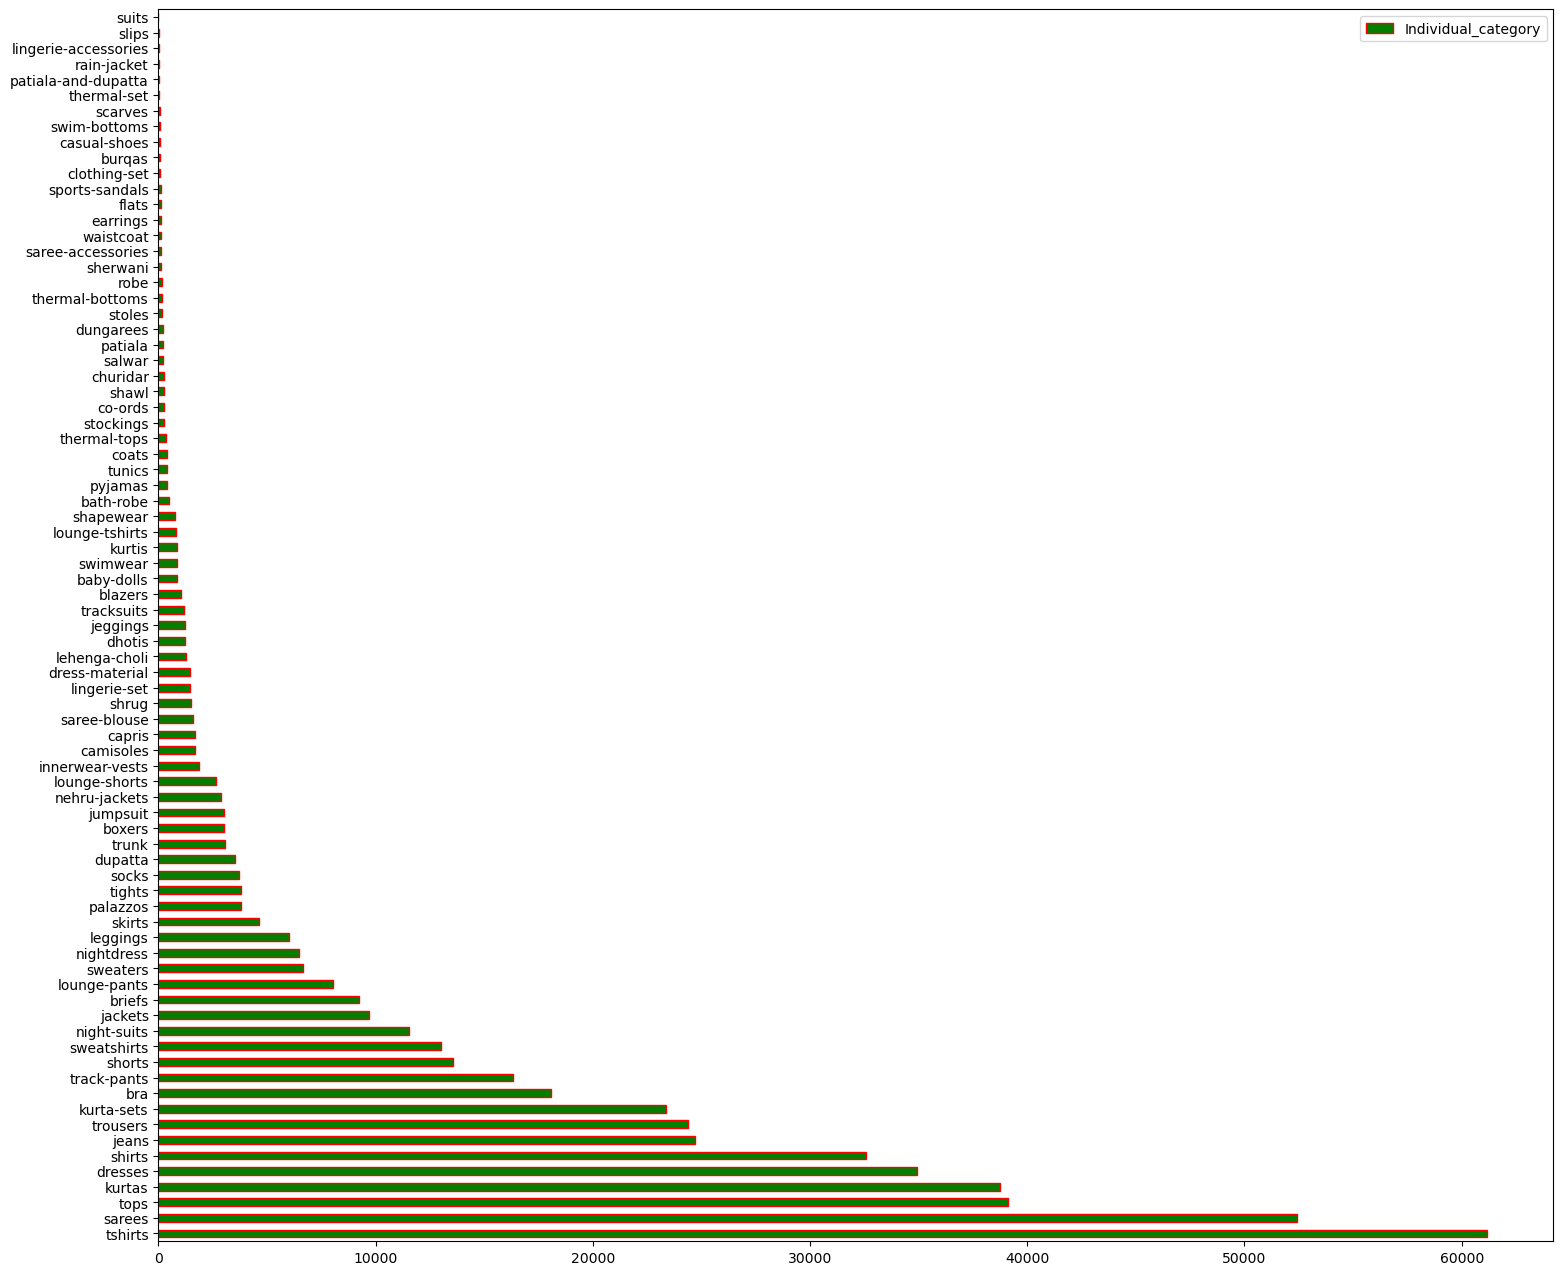

In [70]:
ax=plt.figure(figsize=[18,16])
data["Individual_category"].value_counts().plot.barh(color='green',edgecolor='red')
plt.legend()

## Conclusion
### This graph shows the TOP-20 product brand using bar graph


# 

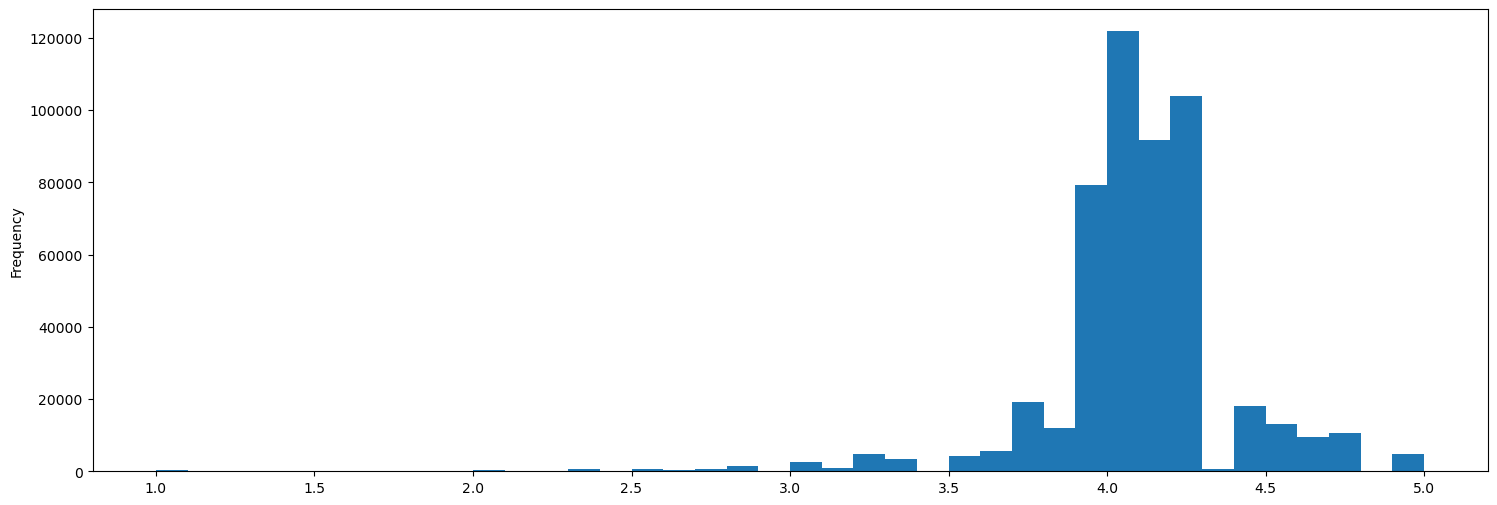

In [89]:
ax=plt.figure(figsize=[18,6])
data.Ratings.plot.hist(bins=40)
plt.show()

## Conclusion
### This graph shows the where the most ratings area of products using histogram4
### lie in 3.5 - 4.5

# 

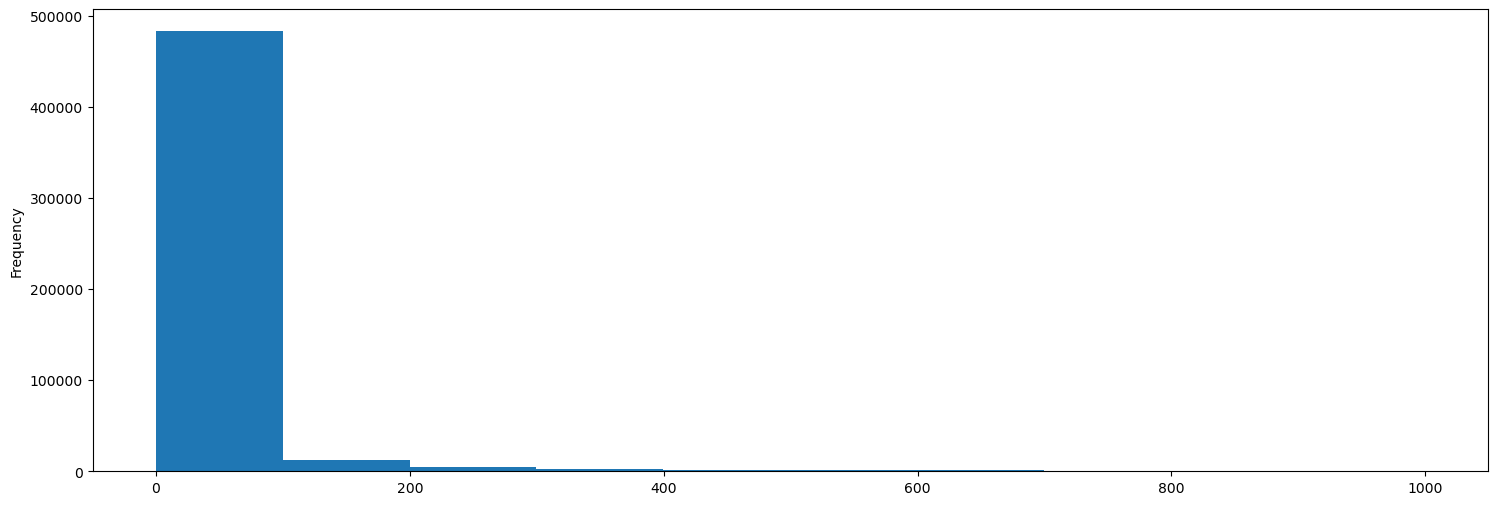

In [88]:
ax=plt.figure(figsize=[18,6])
data.Reviews.plot.hist(bins=10)
plt.show()

## Conclusion
### This graph shows the where the most Reviews area of products using histogram4
### lie in 0-100

# Bivariate Analysis

In [ ]:
data.head()

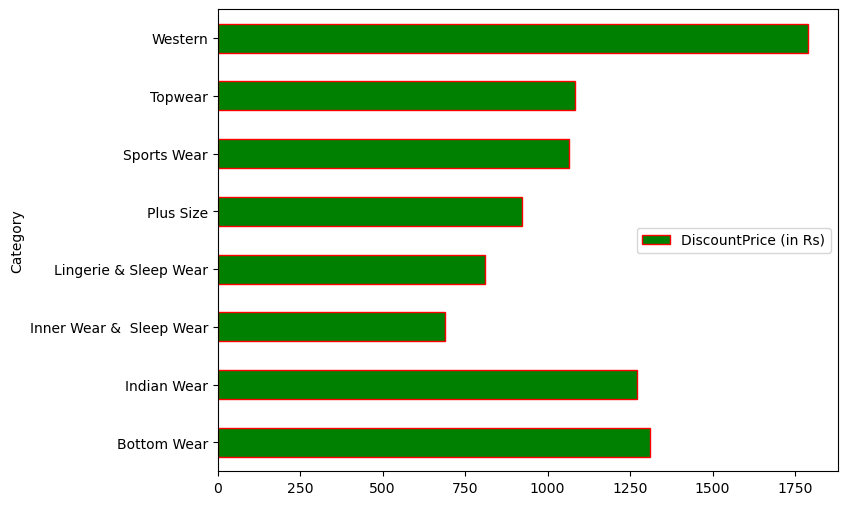

In [73]:
ax=plt.figure(figsize=[8,6])
data.groupby('Category').mean()['DiscountPrice (in Rs)'].head(15).plot.barh(color='green',edgecolor='red')
plt.legend()

## Conclusion
### It shows the mean discount on each category
### it is found that western wear has high mean descount price

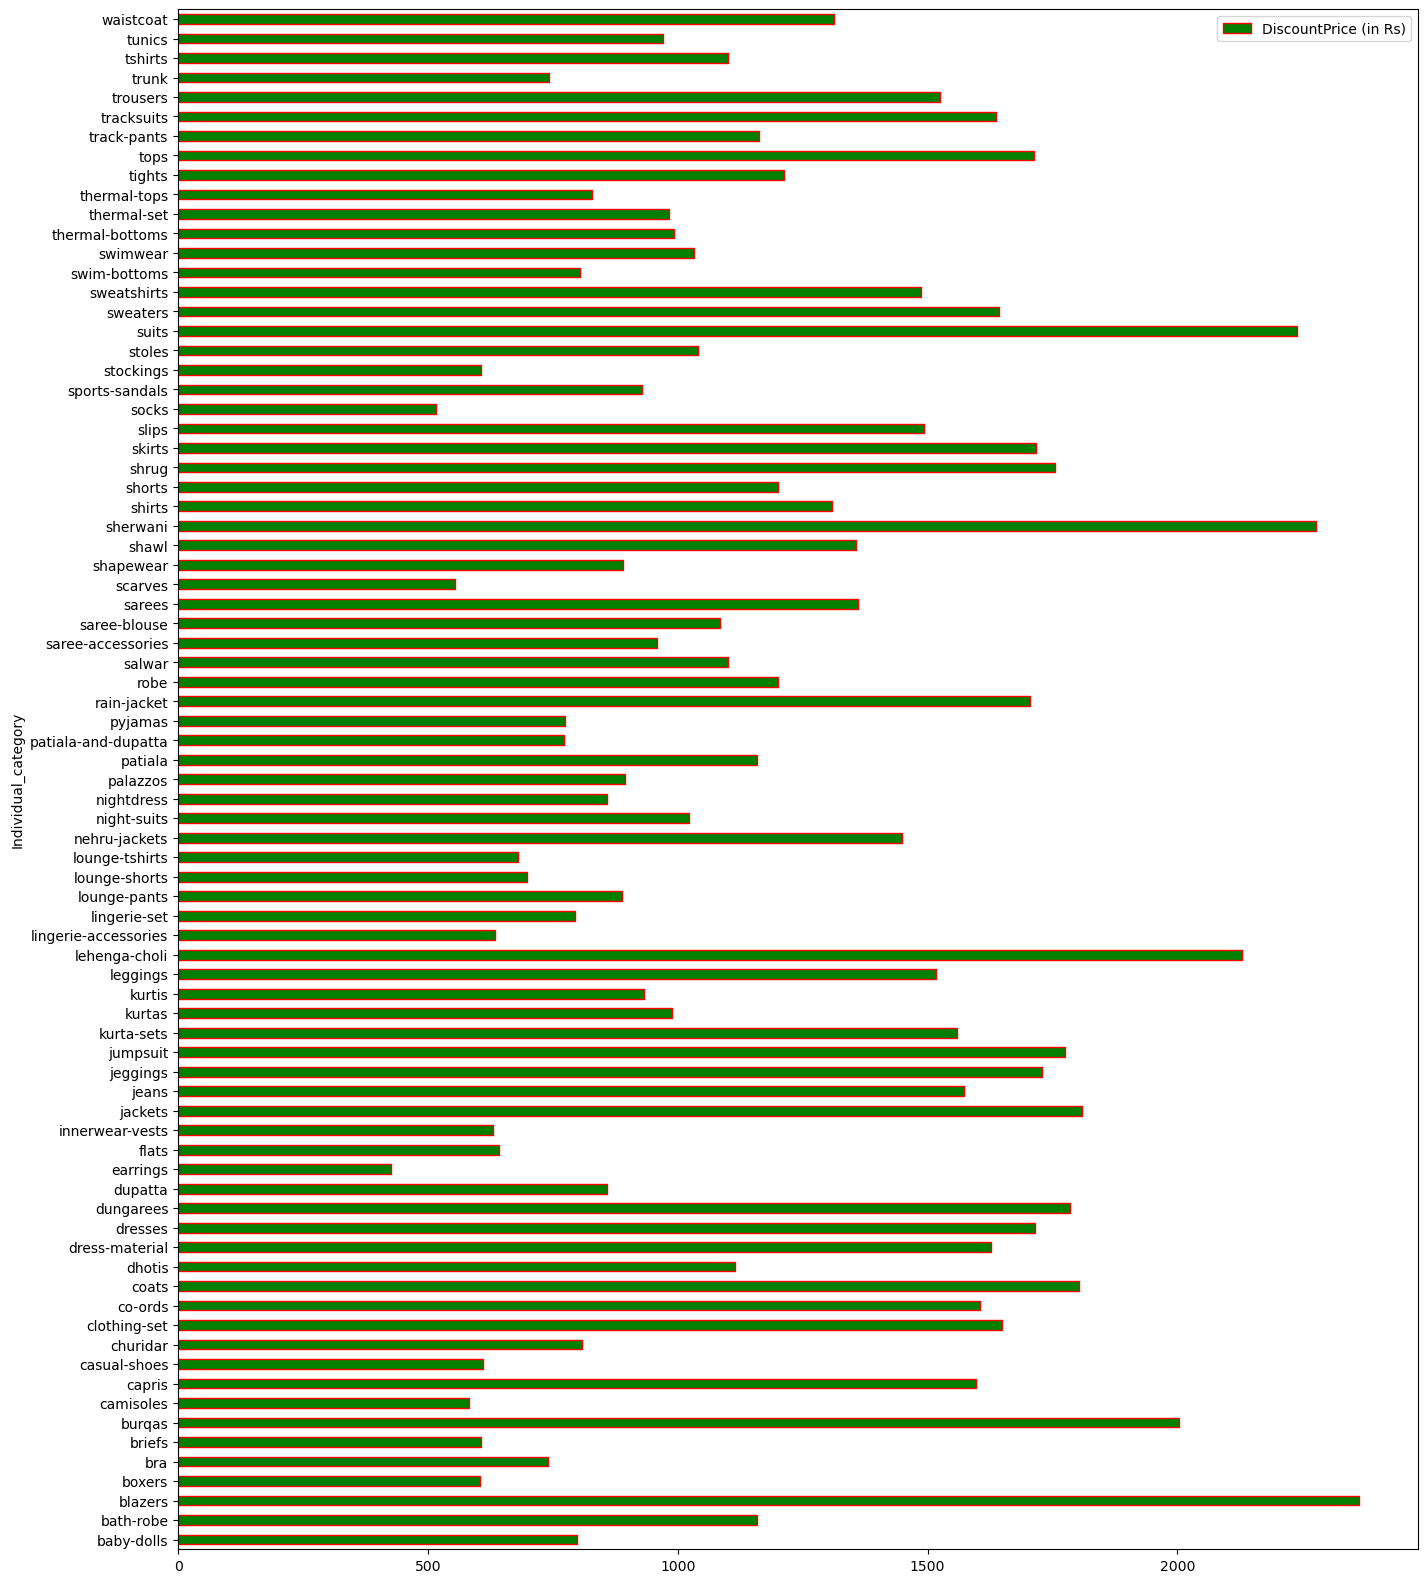

In [74]:
ax=plt.figure(figsize=[16,20])
data.groupby('Individual_category').mean()['DiscountPrice (in Rs)'].plot.barh(color='green',edgecolor='red')
plt.legend()

## Conclusion
### It shows the mean discount of all individual clothes
### it is found that suits ahev high discount price

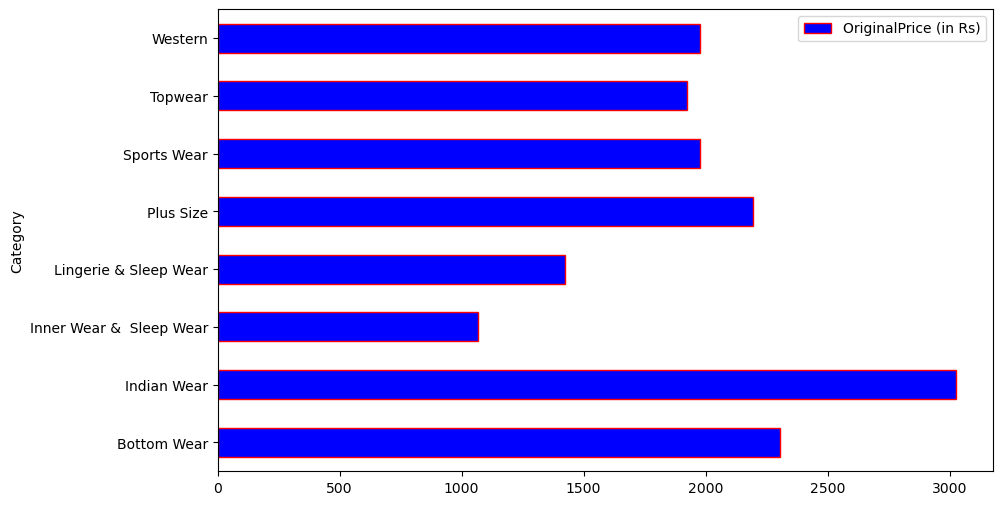

In [75]:
ax=plt.figure(figsize=[10,6])
data.groupby('Category').mean()['OriginalPrice (in Rs)'].plot.barh(color='blue',edgecolor='red')
plt.legend()

## Conclusion
### It shows the mean price of all individual category of clothes
### it is found that the indian wear has high mean price on myntra

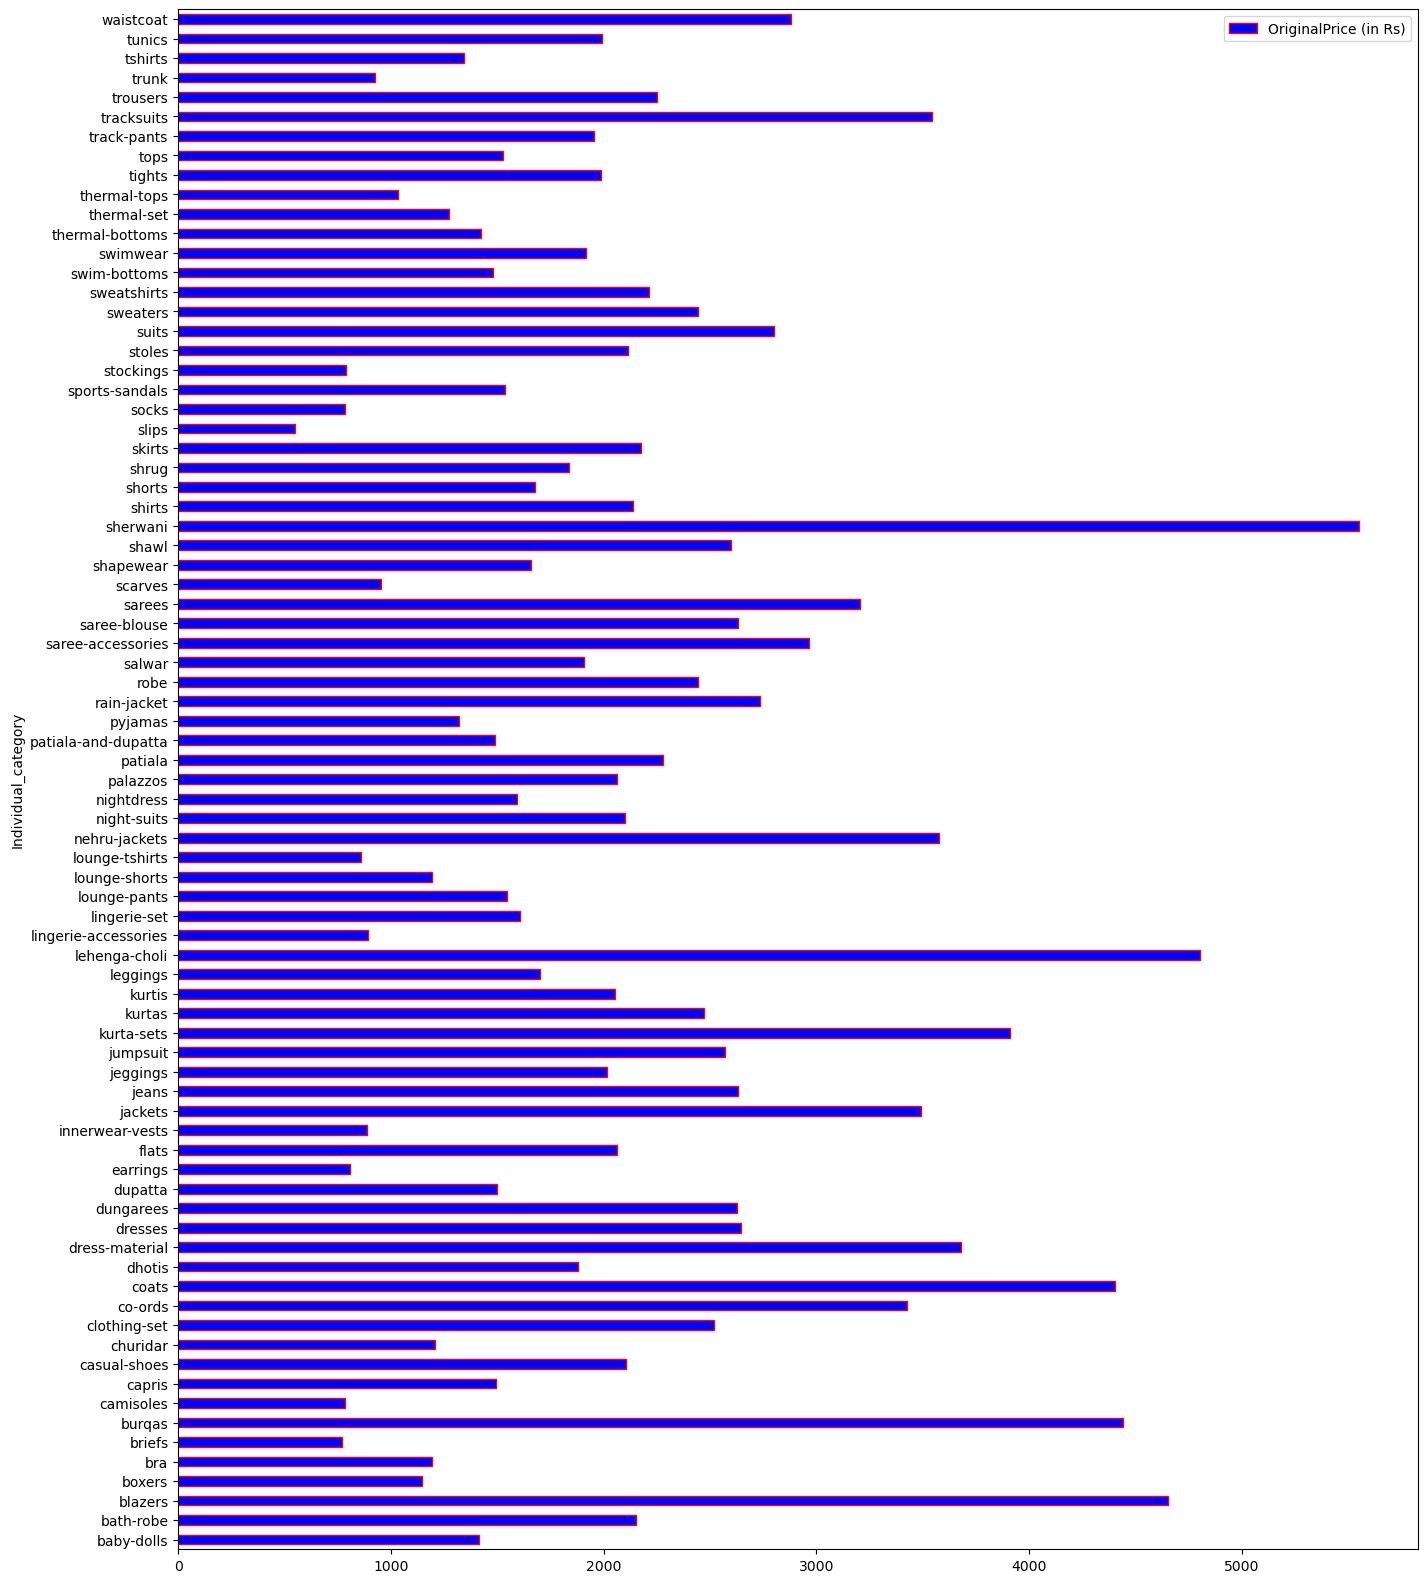

In [76]:
ax=plt.figure(figsize=[16,20])
data.groupby('Individual_category').mean()['OriginalPrice (in Rs)'].plot.barh(color='blue',edgecolor='red')
plt.legend()

## Conclusion
### It shows the mean price of all individual clothes
### it is found that suits are most expnesive average price on myntra platform

# Multivariate

In [77]:
data.corr()

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews
Product_id,1.000000,0.074470,0.123297,0.007168,-0.293444
DiscountPrice (in Rs),0.074470,1.000000,0.480364,-0.035593,-0.060925
OriginalPrice (in Rs),0.123297,0.480364,1.000000,-0.141639,-0.090904
Ratings,0.007168,-0.035593,-0.141639,1.000000,0.054926
Reviews,-0.293444,-0.060925,-0.090904,0.054926,1.000000


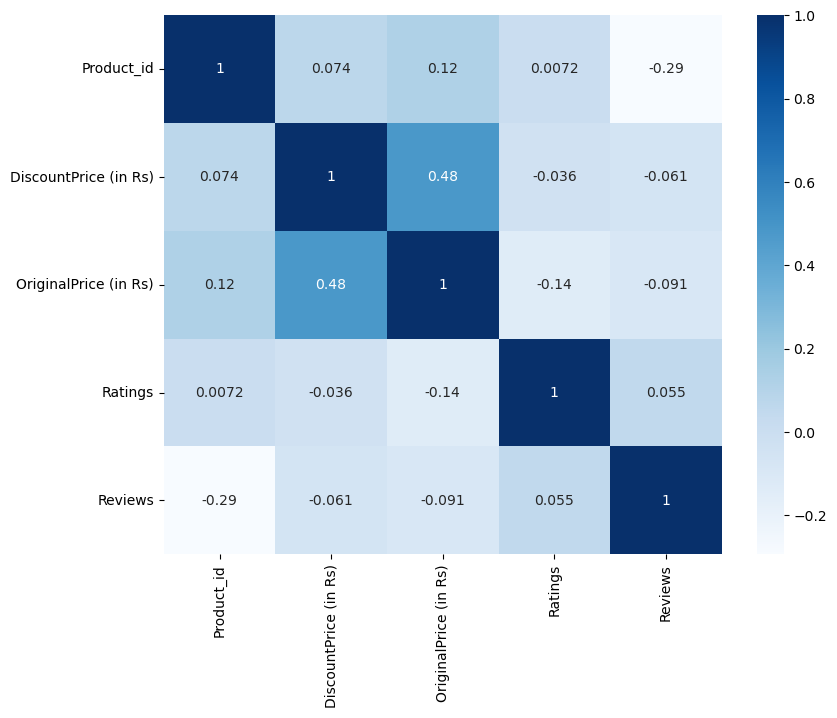

In [78]:
# displaying the plotted heatmap
ax=plt.figure(figsize=[9,7])
sns.heatmap(data = data.corr(),cmap="Blues",annot=True) 
plt.show()

## Conclusion
### this heatmap shows the realtionship of data as using correaltion 

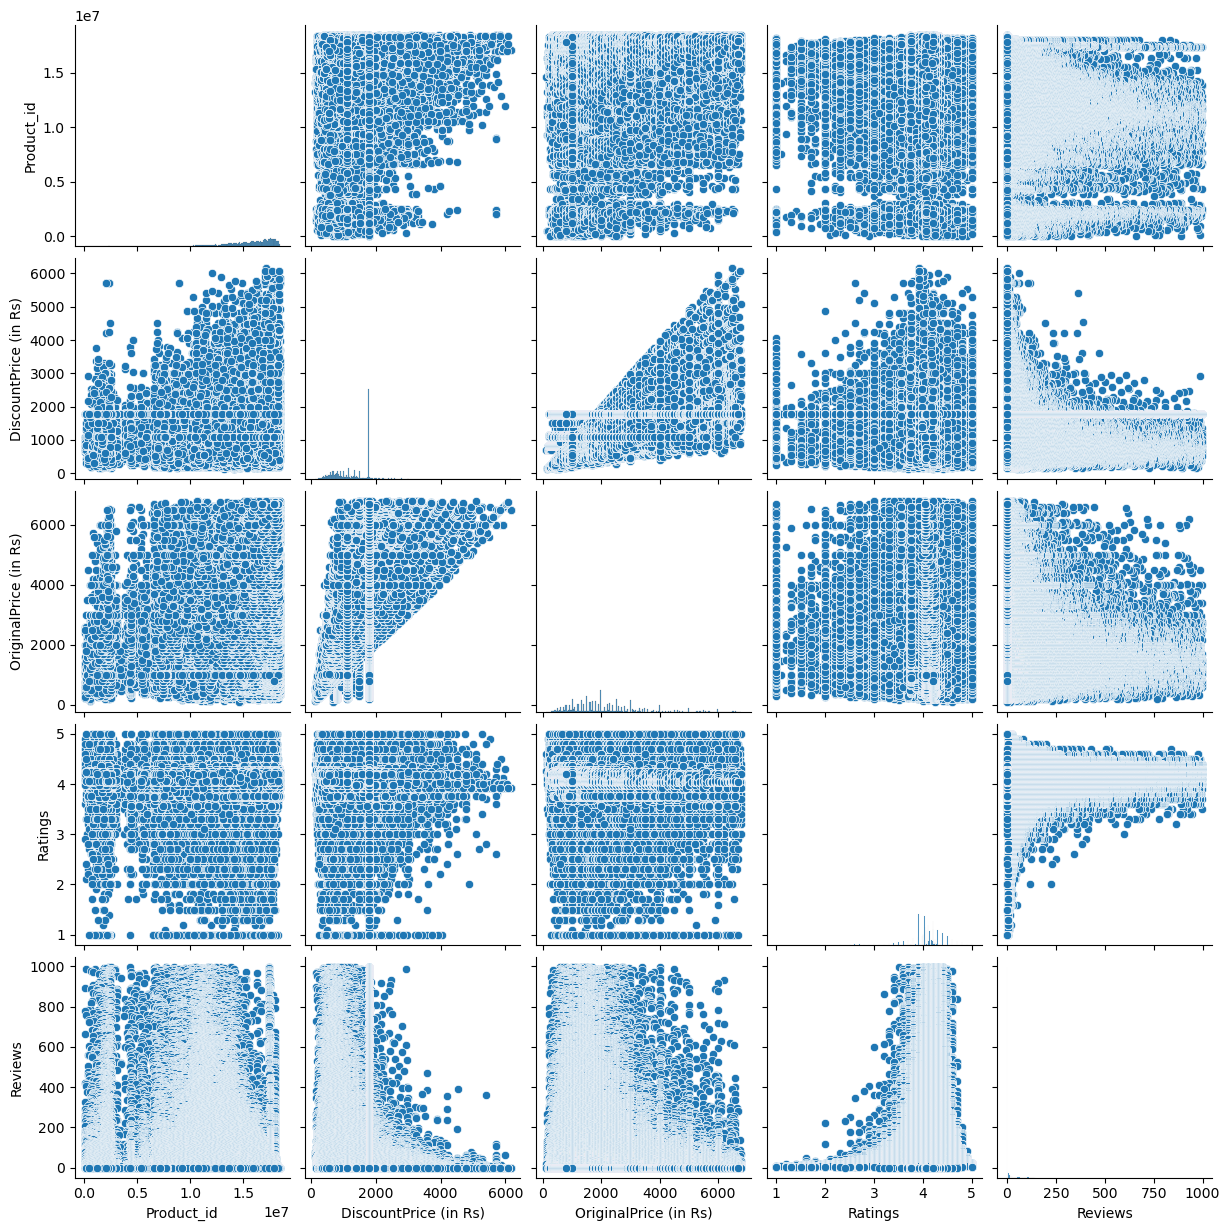

In [74]:
sns.pairplot(data,size=2.5)

## Conclusion-
### Using Pair plot we found the most relation of where the most of data lies when compare with other columns
#### for example we c an see higher the reviews for high ratings 

In [ ]:
data.head()

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

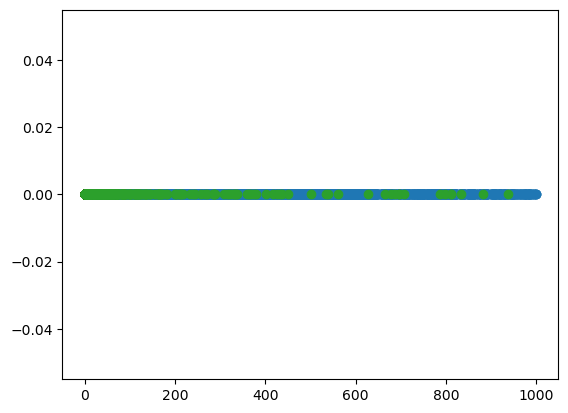

In [93]:
plt.plot(data_Roadster["Reviews"],np.zeros_like(data_Roadster["Reviews"]),'o')
plt.plot(data_Pothys["Reviews"],np.zeros_like(data_Pothys["Reviews"]),'o')
plt.plot(data_KALINI["Reviews"],np.zeros_like(data_KALINI["Reviews"]),'o')
plt.show()

## Hypothesis Testing

In [78]:
# importing the library for t-test 
#let alpha value be 0.05 or 5%

rating_mean=np.mean(data["Ratings"])
rating_mean

4.082851047080625

# NULL hypothesis will say there is no difference in mean of ratings while alternate will say opposite

In [80]:
from scipy.stats import ttest_1samp
# creating random sample from the column rating
sample_size=10000
rating_sample=np.random.choice(data["Ratings"],sample_size) 

In [91]:
# finding p-value for sample
ttest,p_value=ttest_1samp(rating_sample,4)

In [92]:
print(p_value)

4.371797552021064e-164


In [93]:
if(p_value < 0.01):
    print("We are rejecting the null hypothesis")
else:
    print("we are accepting the null hypothesis")

We are rejecting the null hypothesis


# AS WE FOUND THAT IF WE TAKE LARGE DATA THE P-VALUE DECREASE TO 0.00 SO WE CANT USE P-VALUE TEST FOR THIS DATA

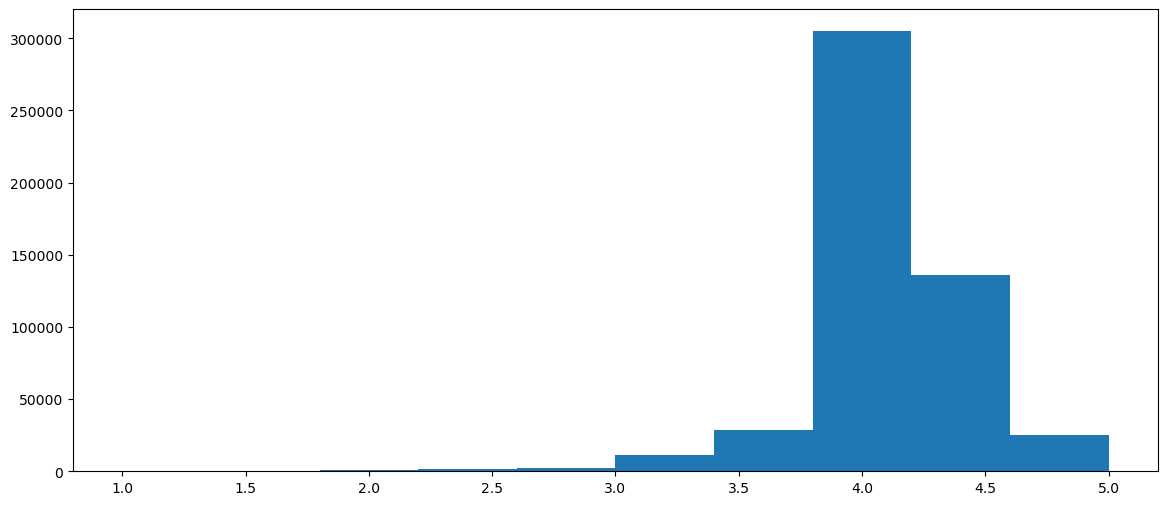

In [81]:
## checking if ratings are normal distribur=tion or not
from matplotlib import pyplot
pyplot.figure(figsize=(14,6))
pyplot.hist(data["Ratings"])
pyplot.show()

In [82]:
from scipy.stats import shapiro
dataToset =data["Ratings"]
stat, p=shapiro(dataToset)
print("stat=%.2f , p=%.30f" % (stat, p))
if p>0.05:
    print("Normal Distribution")
else:
    print("Not a normal distribution")

stat=0.82 , p=0.000000000000000000000000000000
Not a normal distribution


## Conclusion
### Using shapiro library we found that data is not in normal distrubution

# So using T-Test and checking the if the data is normally distributed we found that null hypothesis is rejected in case of Ratings data